## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv',usecols=['temperature','gender'])
df.head()

,temperature,gender
0,99.3,F
1,98.4,F
2,97.8,M
3,99.2,F
4,98.0,F


1\. Is the distribution of body temperatures normal?

I plotted a histogram of the temperature data and compared it to a normal distibution with the same mean and standard deviation. The temperature data does appear to be approximately a normal distribution. Using normaltest in scipy I get a p-value of 0.26, which means we cannot rule out the null hypotheisis that it is a normal distribution.

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

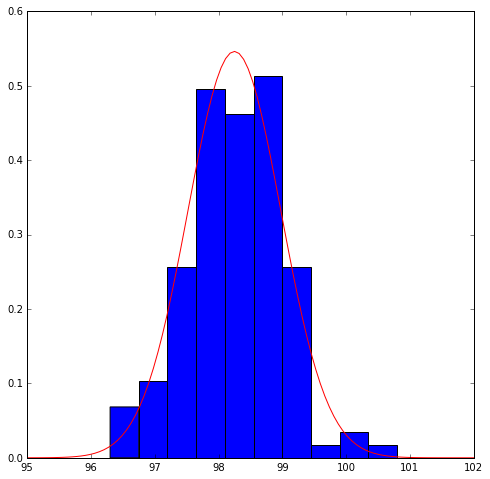

In [3]:
n = len(df)
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
stderr = sigma/np.sqrt(n)

x = np.linspace(95,102, 100)

plt.figure(figsize=(8,8))
plt.hist(df.temperature,normed=1)
plt.plot(x,mlab.normpdf(x, mu, sigma),color='r')

stats.normaltest(df.temperature)

2\. Is the true population mean really 98.6 degrees F?

I calculated a z-value assuming a null hypothesis with the mean temperature = 98.6 degrees. This is a large enough sample that a z-test is appropriate. 

In [4]:
print('Number of people =', n)
print('Mean temperature =', mu)
print('         Std dev =', sigma)
print('       Std error =', stderr)

Number of people = 130
Mean temperature = 98.24923076923078
         Std dev = 0.7303577789050377
       Std error = 0.0640566146952


In [5]:
mu_null = 98.6

z = (mu_null - mu)/stderr
z

5.4759252020781162

A z-value of 3.0 would mean there is around a 0.3% chance of this result occurring by chance assuming the null hypothesis. This z-value is much larger than this, which allows us to reject the null hypothesis.

3\. At what temperature should we consider someone's temperature to be "abnormal"?

In [6]:
# Confidence interval (significance = 0.05)
z05 = 1.96
conf = z05*stderr
[mu - conf, mu + conf]

[98.123679804428193, 98.374781734033363]

In [7]:
# Abnormal temperature: define as being one standard deviation from the confidence interval
[mu - conf - sigma,mu + conf + sigma]

[97.393322025523162, 99.105139512938393]

4\. Is there a significant difference between males and females in normal temperature?

In [8]:
dfg = df.groupby('gender')

dfmen = pd.DataFrame({'n':dfg.count().loc['M'], 'mu':dfg.mean().loc['M'],'sigma':dfg.std().loc['M'], \
                      'stderr':dfg.std().loc['M']/np.sqrt(dfg.count().loc['M'])}).reset_index(drop=True)

dfwmn = pd.DataFrame({'n':dfg.count().loc['F'], 'mu':dfg.mean().loc['F'],'sigma':dfg.std().loc['F'], \
                      'stderr':dfg.std().loc['F']/np.sqrt(dfg.count().loc['F'])}).reset_index(drop=True)
print('Men:')
print(dfmen)
print('Women:')
print(dfwmn)

Men:
          mu   n     sigma   stderr
0  98.104615  65  0.698756  0.08667
Women:
          mu   n     sigma    stderr
0  98.393846  65  0.743488  0.092218


In [9]:
# Calculate the difference in the means and the standard deviation of the difference
mu_diff = dfwmn.mu - dfmen.mu

std_diff = np.sqrt(dfmen.stderr**2 + dfwmn.stderr**2)

print('   Difference in mean =', mu_diff[0])
print('Std err of difference =', std_diff[0])

   Difference in mean = 0.289230769231
Std err of difference = 0.12655395042


In [10]:
z = mu_diff[0]/std_diff[0]
z

2.2854345381652617

With a z-score of 2.29, there is a less than 2% chance that this difference would occur by chance, so we can reject the null hypothesis that the means are the same.